# Construction d'un neurone

On commence par construire un neurone simple, qu'on va ensuite tester. Je m'inspire beaucoup de l'exemple donné par [Miximum](https://www.miximum.fr/blog/introduction-au-deep-learning-1/).

J'utilise une classe définissant un objet neurone, qui aura:
- un constructeur (nommé classiquement `__init__`), 
- une méthode d'activation 
- une méthode de mise à jour les poids des neurones qui lui sont connectés en amont. 

Dans cette première étape, l'activation du neurone consiste à faire la moyenne pondérée des signaux qui lui arrivent et de passer le résultat.

In [7]:
import numpy as np

class Neuron:
    def __init__(self, input_weights):
        """Initialisation des poids / biais avec des valeurs aléatoires."""
        self.weights = input_weights
        
    def activation(self, X):
        """On suppose que X est de la taille passée dans le constructeur."""
        return np.average(X, weights= self.weights)
    
    def update_weights(self, input_weights):
        """ mise à jour des poids """
        self.weights = input_weights

Le neurone sera testé en lui demandant de distinguer deux entrées qui sont radicalement différentes : `Vec1` et `Vec2`.

In [8]:
n = 10
nb_zeros = 5
Uns = np.ones(nb_zeros)
Zeros = np.zeros(n - nb_zeros)
Vec1 =  np.concatenate((Zeros, Uns))
print(Vec1)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [9]:
Vec2 = np.concatenate((Uns, Zeros))
print(Vec2)

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


Je veux que mon neurone renvoie 1 avec `Vec1` et 0 avec `Vec2`.

L'objectif sera de trouver les bons adéquats pour que la sortie du neurone corresponde à cette reconnaissance recherchée. Le sujet est simple et je peux directement deviner les poids qui fonctionneront bien.

In [10]:
VecWght = Vec1
VecWght

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

Je construis maintenant mon neurone avec la classe définit précédement. Je me souviens que pour cela, le constructeur `__init__` demande de donner le nombre de neurones connectés en amont, donc ici mes `n` entrées.

In [11]:
mon_neurone = Neuron(VecWght)
res = mon_neurone.activation(Vec1)
print(f'{res*100:.2f}%')

100.00%


In [12]:
res = mon_neurone.activation(Vec2)
print(f'{res*100:.2f}%')

0.00%


La reconnaissance est parfaite, mais le cas était bien sûr bien trop simple.

# Rendre l'entrée plus visuelle

Les principes de base étant compris, j'améliore l'entrée pour qu'elle soit plus visuelle : je demande de reconnaître deux images radicalement différente. Pour rester simple, je prends une matrice 12x12 qui contient doinc 144 points. L'extension [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) propose la commande [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) pour afficher des matrices de points.

Comme image je choisi simplement de mettre la moitié inférieur en blanc (avec des 1), la moitié supérieure restant noire. Pour construire mon image, j'utilise les techniques de remplissage rapide sur les vecteurs Numpy données dans le fichier [01_numpy.ipynb](../02_std_ext/01_numpy.ipynb). Ensuite, on passe d'un vecteur de 144 points à une matrice de 12x12 en utilisant la commande [numpy.reshape](https://www.w3schools.com/python/numpy/numpy_array_reshape.asp).

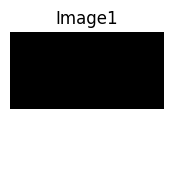

In [13]:
nb_points = 144
Zeros = np.zeros(nb_points//2)   # attention, bien utiliser la division d'entiers
Ones = np.ones(nb_points - nb_points // 2)

Input1 = np.concatenate((Zeros, Ones))
Matrice1 = np.reshape(Input1, (12, 12))

import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(Matrice1, cmap="gray")
plt.title('Image1')
plt.axis("off")
plt.show()

Pour la deuxième image à distinguer, qui sera donc `Input2`, je choisis de mettre en blanc la partie supérieure de l'image.

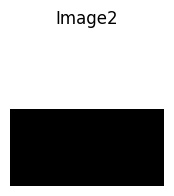

In [14]:
Input2 = np.concatenate((Ones, Zeros))
Matrice2 = np.reshape(Input2, (12, 12))

import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(Matrice2, cmap="gray")
plt.title('Image2')
plt.axis("off")
plt.show()

Pour distinguer `Image1` d'`Image2`, je peux facilement deviner les poids qu'il faut utiliser.

In [15]:
Weight = Input1

Avec ce poids, je suis sûr d'obtenir 1 avec `Input1` et 0 avec `Input2`.

In [16]:
# on aplatit la matrice de poids
mon_neurone = Neuron(Weight)
res = mon_neurone.activation(Input1)
print(f'{res*100:.2f}%')

100.00%


In [17]:
res = mon_neurone.activation(Input2)
print(f'{res*100:.2f}%')

0.00%


Sur ces deux cas élémentaires, j'ai une distinction parfaite.

# Rendre l'entrée moins simple

Le cas précédant était trop simple pour montrer l'intérêt du neurone. J'introduis maintenant du bruit pour rendre la distinction moins triviale. J'utilise les fonctions randoms présentées dans le fichier [02_random](../02_std_ext/02_random.ipynb) pour générer des séries de nombres entre 0 et 255 qui donnent une échelle de gris. Par contre, les entrées `Input3` et `Input4` sont consituées de valeurs normalisées entre 0 et 1. Enfin j'affiche les images côte à côte avec le commande [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html).

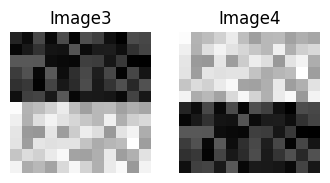

In [18]:
rng = np.random.RandomState(seed=1)
Sombres = rng.randint(0, 90, size= nb_points // 2) / 255
Clairs = rng.randint(150, 255, size= nb_points // 2) /255

Input3 = np.concatenate((Sombres, Clairs))
Input4 = np.concatenate((Clairs, Sombres))

plt.figure(figsize=(4,8))
plt.subplot(1,2, 1)
plt.imshow(np.reshape(Input3,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Image3")

plt.subplot(1,2, 2)
plt.imshow(np.reshape(Input4,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Image4")

plt.show()


J'essaye toujours d'appliquer la distinction faite par le neurone pour ces deux images différentes.

In [19]:
# Weight = np.concatenate((np.ones(72)*-1, np.ones(72)))
Weight = np.concatenate((np.zeros(72),np.ones(72)))

In [20]:
mon_neurone = Neuron(Weight)
res = mon_neurone.activation(Input3)
print(f'{res*100:.2f}%')

78.52%


In [21]:
res = mon_neurone.activation(Input4)
print(f'{res*100:.2f}%')

16.43%


Sans trop de surprise la reconnaissance, la reconnaissance est moins claires. Sin on veut avoir une réponse plus claires, il faut utiliser La fonction [sigmoïde](02_regression_logistique.ipynb) qui séparera mieux les valeurs pour donner un résultat moins équivoque.

In [22]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

import plotly.graph_objects as go
# mon style personnalisé pour les graphiques
fond_gris = {
  'layout': go.Layout(
            title={'font_size':24, 'font_color':'black'},
            margin={'t': 60, 'b': 10, 'l': 20, 'r': 20},
            paper_bgcolor='gray',
            plot_bgcolor='lightgray'
  )
}
# plus d'info sur les personnalisations graphiques sur :
# https://plotly.com/python/templates/

x = np.arange(-6, 6, 0.1)
fig = go.Figure(data=go.Scatter(x=x, y=sigmoid(x)))
fig.update_layout(title='la fonction Sigmoïde', template=fond_gris)
fig.show()

In [23]:
class Neuron2:
    def __init__(self, input_weights):
        """Initialisation des poids / biais avec des valeurs aléatoires."""
        self.weights = input_weights
        
    def activation(self, X):
        """On suppose que X est de la taille passée dans le constructeur."""
        aggregation = np.dot(self.weights, X)  # produit scalaire
        return sigmoid(aggregation)
    
    def update_weights(self, input_weights):
        """ mise à jour des poids """
        self.weights = input_weights

Les poids doivent aussi être modifiés, car la fonction Sigmoïde demande une entrée entre $-\infty$ et $+\infty$. Je ne donne donc plus des poids à 0 ou 1 mais à -1 ou 1 selon la zone que je veux reconnaître. Ces choix de poids sont faits pour aller directement à un résultat pertinnent. Dans le chapitre suivant nous allons voir comment construire un algorithme qui retrouve ces *poids pertinents*.

In [24]:
Weight = np.concatenate((np.ones(72)*-1, np.ones(72)))

In [25]:
mon_neurone2 = Neuron2(Weight)
res = mon_neurone2.activation(Input3)
print(f'{res*100:.2f}%')

100.00%


In [26]:
res = mon_neurone2.activation(Input4)
print(f'{res*100:.2f}%')

0.00%


Dans un cas plus complexe (et plus proche de la réalité de nos perception), la fonction Sigmoïde aide à faire la distinction entre deux zones, même si l'une des zones a été floutée.

# Vers un apprentissage supervisé automatique (pas fini !)

L'objectif d'un apprentissage automatique est de construire un algorithme permettant de trouver automatiquement les poids à utiliser en fonction des images qui lui sont soumises et du résultat qu'on veut en obtenir.

Ici nous avons quatres images et nous voulons les classer ainsi :
- Image1, Image2 : le résultat doit être vrai, ou 100%
- Image2, Image4 : le résultat doit être faux, ou 0%

In [27]:
Input = [Input1, Input2, Input3, Input4]
Expected = [1., 0., 1., 0.]

Dans un premier temps nous allons paramétrer le nombre de lectures pour "apprendre". Dans un véritable algorithme, il faudrait paraméter l'algorithme en fonction de la précision de la reconnaissance qu'on recherche.

L'algorithme va définir une fonction calculant une erreur qui exprime la distance entre le résultat obtenu par le neurone et le resultat attendu. L'objectif sera de réduire cette distance au minimum en modifiant les poids que nous nous donnons à chacune des entrées.

Pour cette algorithme, on peut se souvenir de la méthode de la [regression logistique](02_regression_logistique.ipynb) que nous avons faite dans une autre présentation. On cherche une fonction simple à dériver exprimant cette erreur et on utilisera la méthode du gradien pour aller *dans le bonne direction* dans le recherche des poids qui optimiseront la reconnaissance.

L'avantage de la fonction sigmoïde est qu'elle a une forme qui permet d'améliorer le reconnaissance et une dérivée simple à calculer.

In [28]:
def sigmoid_prime(x):
    """Dérivée de la fonction sigmoid"""
    return sigmoid(x)* (1.0 - sigmoid(x))

x = np.arange(-6, 6, 0.1)
fig = go.Figure(data=go.Scatter(x=x, y=sigmoid_prime(x)))
fig.update_layout(title='la dérivée de la fonction Sigmoïde', template=fond_gris)
fig.show()

Nous devons aussi revoir la définition de notre neurone dans une troisième version, qui contient une méthode pour mettre à jour les poids utilisés par le neurone en fonction d'un gradient qui sera calculé dans notre procédure d'apprentissage automatique.

Si nous notons $(w_i)_i$ les points des entrées $(a_i)_i$ et $\sigma$ la fonction sigmoïde, le calcul effectué par le neurone correspond à l'équation suivante.

$$ y = \sum_{i=1}^n \sigma\left(w_i \cdot a_i \right)$$

L'erreur sera la différence $\delta = y_0 - y$ entre ce calcul est la valeur que nous recherchons pour une entrée $(a_i)_i
$ donnée. Nous faisons varier ces poids $(w_i)_i$ et nous cherchons à minimiser cette erreur. Le gradient en fonction des $(w_i)_i$ se calcule de la manière suivante.

$$\overrightarrow{\nabla y} = \sum_{i=1}^n \frac{\partial y}{\partial w_i} \overrightarrow{e_i}$$

Chacune de dérivée partielle se calcule ainsi.

$$\frac{\partial y}{\partial w_i} = \frac{\partial{\sigma(w_i a_i)}}{\partial w_i} = a_i \cdot \sigma(w_i a_i) \cdot \left[1 - \sigma(w_i a_i)\right]$$

Le principe de la descente du gradient donc de réduire le vecteur des poids en utilisant ce gradient, éventuellement avec une vitesse de descente $\alpha$.

$$w_i \longrightarrow w_i - \alpha \cdot a_i \cdot \sigma(w_i a_i) \cdot \left[1 - \sigma(w_i a_i)\right]$$

In [47]:
class Neuron3:
    """
    Troisième version du neurone permettant l'apprentissage automatique
    """
    def __init__(self, Input_weight):
        """Initialisation des poids du neurone"""        
        self.Weight = Input_weight
    
    def aggregation(self, Data):
        """Somme des entrées pondérée par les poids"""
        return np.dot(self.Weight, Data)
    
    def activation(self, Input):
        return sigmoid(self.aggregation(Input))
    
    def update_weights(self, Input, delta, learning_rate = 1):
        """Lise à jour des poids à partir du delta observé"""
        for w,a in zip(self.Weight, Input):
            w -= learning_rate * delta * a * sigmoid_prime(w * a)

    def Weight(self):
        return self.Weight

L'initialisation sera fait avec des poids choisis au hazard.

In [48]:
rng = np.random.RandomState(seed=5)
Weight0 = rng.random_sample(144)
mon_neurone3 = Neuron3(Weight0)

On visualise les poids avec une image.

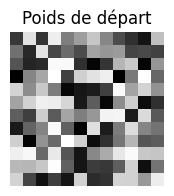

In [49]:
plt.figure(figsize=(2,2))
plt.imshow(np.reshape(mon_neurone3.Weight,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Poids de départ")
plt.show()

Voici les résultats des reconnaissances avec ces poids aléatoires.

In [50]:
for X, num in zip(Input, (1, 2, 3, 4)):
    res = mon_neurone3.activation(X)
    print(f'Image{num}: {res*100:.2f}%')

Image1: 100.00%
Image2: 100.00%
Image3: 100.00%
Image4: 100.00%


À priori, ces poids ne permettent pas de faire la distinction que nous attendons (souvent que des 100%).

Nous maintenant faire plusieur expérimentation et à chacune d'entre elle, nous améliorons le poids avec la méthode du gradient.

In [51]:
NB_ITERATIONS = 100
for num_test in range(NB_ITERATIONS):
    for X, y0 in zip(Input, Expected):
        # calcul en avant (forward)
        y = mon_neurone3.activation(X)
        delta = y0 - y
        
        # pour mettre à jour les poids
        mon_neurone3.update_weights(Input, delta, 1)

        

for X, num in zip(Input, (1, 2, 3, 4)):
    res = mon_neurone3.activation(X)
    print(f'Image{num}: {res*100:.2f}%')

Image1: 100.00%
Image2: 100.00%
Image3: 100.00%
Image4: 100.00%


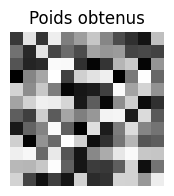

In [53]:
plt.figure(figsize=(2,2))
plt.imshow(np.reshape(mon_neurone3.Weight,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Poids obtenus")
plt.show()

In [ ]:
NB_ITERATIONS = 4
for num_test in range(NB_ITERATIONS):
    for X, y0 in zip(Input, Expected):
        # calcul en avant (forward)
        y = mon_neurone3.activation(X)
        delta = y0 - y
        
        # pour mettre à jour les poids
        mon_neurone3.update_weights(Input, delta, 1)
